<a href="https://colab.research.google.com/github/MJAHMADEE/Machine-Learning-and-Fault-Detection/blob/main/PreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-process and Analysis

## Section I

### Download Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-GFtU-DPbWDsAJ-hckTe0dA2KikfwubJ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1-GFtU-DPbWDsAJ-hckTe0dA2KikfwubJ
To: /content/17112001.csv
100% 15.5M/15.5M [00:00<00:00, 40.0MB/s]


In [ ]:
# !wget ....

In [ ]:
# from google.colab import files
# uploaded = files.upload()

### Read .csv & Call .info

In [ ]:
import pandas as pd
df = pd.read_csv("/content/17112001.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   642.0   86399 non-null  float64
 1   359.0   86399 non-null  float64
 2   97.4    86399 non-null  float64
 3   351.3   86399 non-null  float64
 4   33.9    86399 non-null  float64
 5   33.1    86399 non-null  float64
 6   47.6    86399 non-null  float64
 7   130.5   86399 non-null  float64
 8   134.6   86399 non-null  float64
 9   12.0    86399 non-null  float64
 10  26.6    86399 non-null  float64
 11  67.2    86399 non-null  float64
 12  271.6   86399 non-null  float64
 13  140.1   86399 non-null  float64
 14  172.0   86399 non-null  float64
 15  133.6   86399 non-null  float64
 16  512.1   86399 non-null  float64
 17  169.2   86399 non-null  float64
 18  94.6    86399 non-null  float64
 19  42.2    86399 non-null  float64
 20  71.9    86399 non-null  float64
 21  71.9.1  86399 non-null  float64
 22

## Section II

In [ ]:
df.isnull().sum()

642.0     0
359.0     0
97.4      0
351.3     0
33.9      0
33.1      0
47.6      0
130.5     0
134.6     0
12.0      0
26.6      0
67.2      0
271.6     0
140.1     0
172.0     0
133.6     0
512.1     0
169.2     0
94.6      0
42.2      0
71.9      0
71.9.1    0
3640.5    0
2605.1    0
101.1     0
16.0      0
67.8      0
67.7      0
51.1      0
13.5      0
2412.7    0
397.7     0
dtype: int64

In [ ]:
for i in df.columns:
  print('Number of NaN in',i,'=',df.isna().sum().sum())

Number of NaN in 642.0 = 0
Number of NaN in 359.0 = 0
Number of NaN in 97.4 = 0
Number of NaN in 351.3 = 0
Number of NaN in 33.9 = 0
Number of NaN in 33.1 = 0
Number of NaN in 47.6 = 0
Number of NaN in 130.5 = 0
Number of NaN in 134.6 = 0
Number of NaN in 12.0 = 0
Number of NaN in 26.6 = 0
Number of NaN in 67.2 = 0
Number of NaN in 271.6 = 0
Number of NaN in 140.1 = 0
Number of NaN in 172.0 = 0
Number of NaN in 133.6 = 0
Number of NaN in 512.1 = 0
Number of NaN in 169.2 = 0
Number of NaN in 94.6 = 0
Number of NaN in 42.2 = 0
Number of NaN in 71.9 = 0
Number of NaN in 71.9.1 = 0
Number of NaN in 3640.5 = 0
Number of NaN in 2605.1 = 0
Number of NaN in 101.1 = 0
Number of NaN in 16.0 = 0
Number of NaN in 67.8 = 0
Number of NaN in 67.7 = 0
Number of NaN in 51.1 = 0
Number of NaN in 13.5 = 0
Number of NaN in 2412.7 = 0
Number of NaN in 397.7 = 0


## Section III

### Type1: Numeric (1,2,...)

In [ ]:
import pandas as pd

# read the csv file
df = pd.read_csv('/content/17112001.csv')

# iterate over each column in the dataframe
for col in df.columns:
    # check if the column has a non-numeric data type
    if df[col].dtype == 'object':
        # use the pandas factorize() method to encode the values as integers
        df[col] = pd.factorize(df[col])[0]

# save the updated dataframe to a new csv file
df.to_csv('/content/17112001_2.csv', index=False)

In [ ]:
import pandas as pd

# load the csv file
df = pd.read_csv('/content/17112001_2.csv')

# normalize each column by its own maximum value
normalized_df = df.apply(lambda x: x / x.max(), axis=0)

# save the normalized dataframe to a new csv file
normalized_df.to_csv('/content/17112001_3.csv', index=False)

### Type1: One-hot (Multi-Column)

In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('/content/17112001.csv')

# Loop through each column in the dataframe
for col in df.columns:
    # Check if the column contains non-numeric values (i.e. objects)
    if df[col].dtype == 'object':
        # Convert non-numeric values to one-hot encoded columns
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        # Drop the original column
        df.drop(columns=[col], inplace=True)

# Save result to a new CSV file
df.to_csv('/content/17112001_4.csv', index=False)

### Type1: One-hot (Single-Column)

In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('/content/17112001_3.csv')

# Group columns by the characters before the first underscore in their headers
groups = {}
for col in df.columns:
    prefix = col.split('_')[0]
    if prefix not in groups:
        groups[prefix] = []
    groups[prefix].append(col)

# Merge columns within each group and remove original columns
for prefix, cols in groups.items():
    if len(cols) > 1:
        new_col = '_'.join([prefix] + [''.join(c.split(prefix+'_')[1:]) for c in cols])
        df[new_col] = df[cols].apply(lambda x: ' '.join(x.astype(str)), axis=1)
        df.drop(columns=cols, inplace=True)

# Save result to a new CSV file
df.to_csv('/content/17112001_5.csv', index=False)

## Section IV

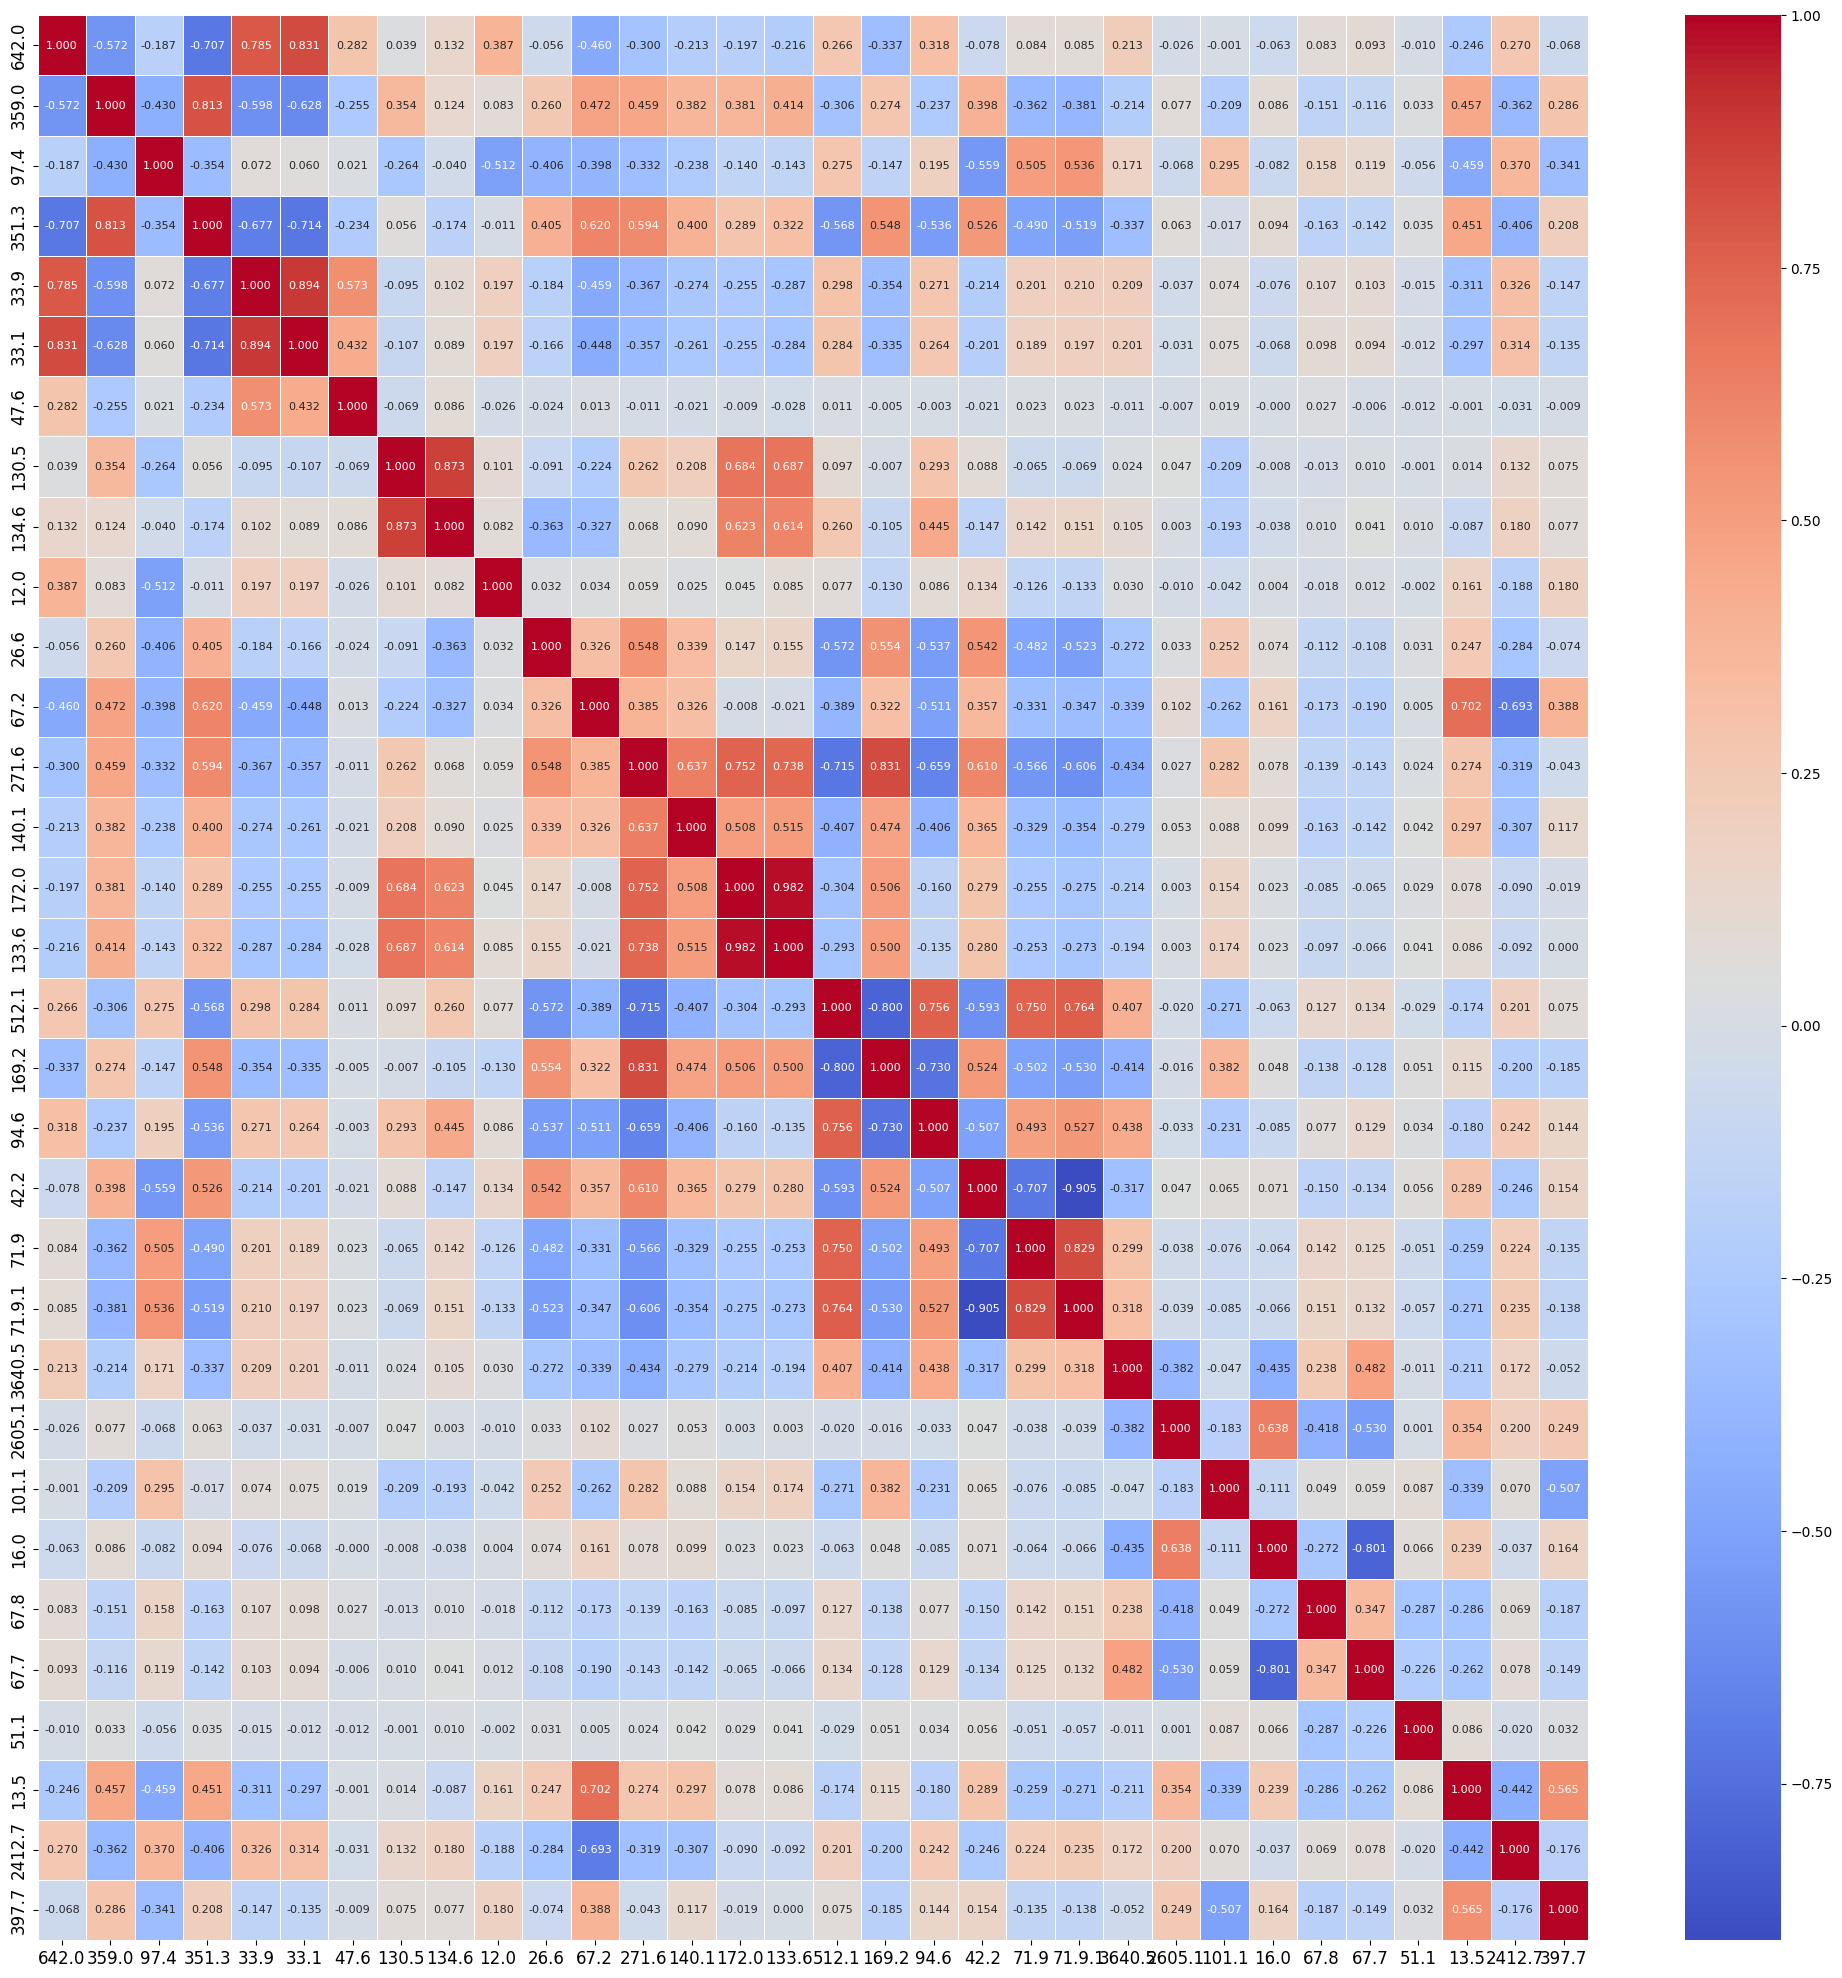

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/17112001.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')

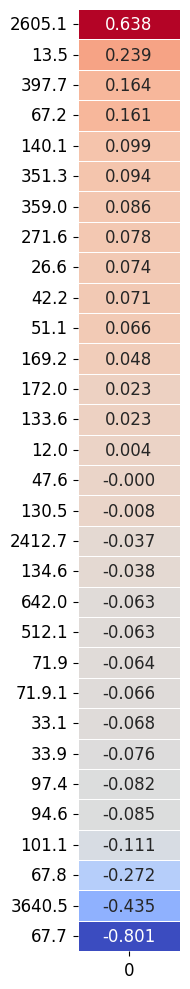

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/17112001.csv')

# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('16.0')

# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['16.0']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.tight_layout()
plt.savefig('priceCM1.pdf', bbox_inches='tight')

## Section VI

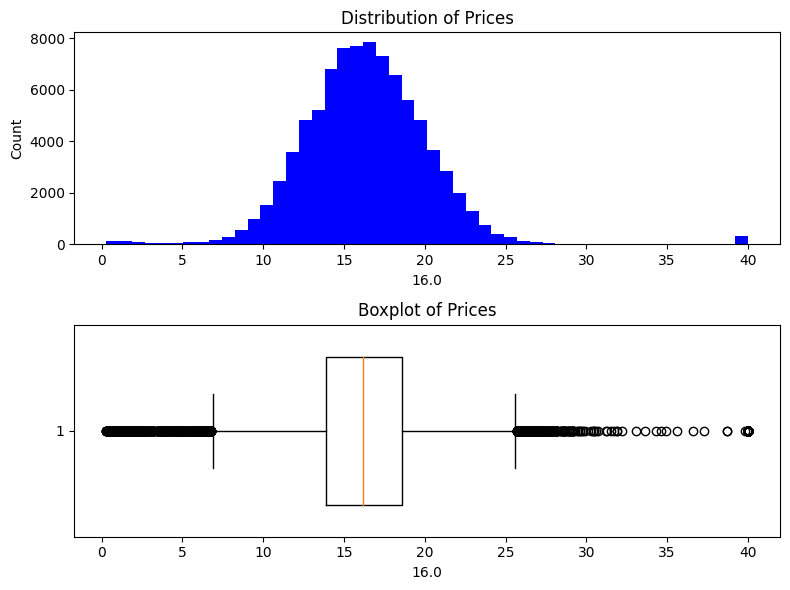

(0, 8000]           86399
(8000, 16000]           0
(16000, 24000]          0
(24000, 32000]          0
(32000, 40000]          0
(40000, 48000]          0
(48000, 56000]          0
(56000, 64000]          0
(64000, 72000]          0
(72000, 80000]          0
(80000, 88000]          0
(88000, 96000]          0
(96000, 104000]         0
(104000, 112000]        0
(112000, 120000]        0
(120000, 128000]        0
(128000, 136000]        0
(136000, 144000]        0
(144000, 152000]        0
Name: 16.0, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/17112001.csv')

# Plot the distribution of the 'price' column as a histogram
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.subplot(2, 1, 1)  # Create the first subplot
plt.hist(df['16.0'], bins=50, color='blue')
plt.xlabel('16.0')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Plot a boxplot of the 'price' column
plt.subplot(2, 1, 2)  # Create the second subplot
plt.boxplot(df['16.0'], vert=False, widths=0.7)
plt.xlabel('16.0')
plt.title('Boxplot of Prices')

plt.tight_layout()  # Automatically adjust subplot parameters

# Save the plot as a PDF file with a fit margin
plt.savefig('dist1.pdf', bbox_inches='tight')
plt.show()

# Define the bins for the price ranges
price_ranges = pd.cut(df['16.0'], bins=range(0, 160000, 8000))
# Calculate the count of prices in each range
price_counts = price_ranges.value_counts().sort_index()
# Display the price range counts
print(price_counts)

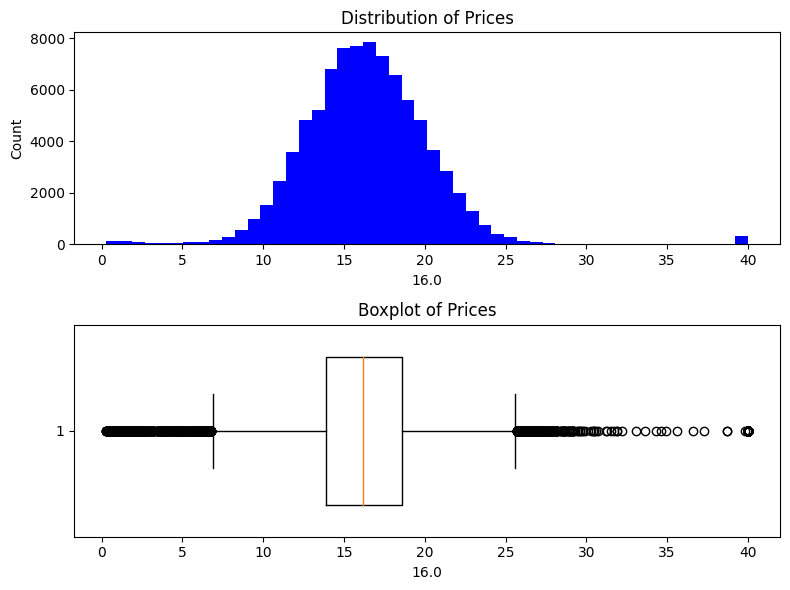

(0, 8000]           86399
(8000, 16000]           0
(16000, 24000]          0
(24000, 32000]          0
(32000, 40000]          0
(40000, 48000]          0
(48000, 56000]          0
(56000, 64000]          0
(64000, 72000]          0
(72000, 80000]          0
(80000, 88000]          0
(88000, 96000]          0
(96000, 104000]         0
(104000, 112000]        0
(112000, 120000]        0
(120000, 128000]        0
(128000, 136000]        0
(136000, 144000]        0
(144000, 152000]        0
Name: 16.0, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/17112001.csv')

# Plot the distribution of the 'price' column as a histogram
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.subplot(2, 1, 1)  # Create the first subplot
plt.hist(df['16.0'], bins=50, color='blue')
plt.xlabel('16.0')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Plot a boxplot of the 'price' column
plt.subplot(2, 1, 2)  # Create the second subplot
plt.boxplot(df['16.0'], vert=False, widths=0.7)
plt.xlabel('16.0')
plt.title('Boxplot of Prices')

plt.tight_layout()  # Automatically adjust subplot parameters

# Save the plot as a PDF file with a fit margin
plt.savefig('dist2.pdf', bbox_inches='tight')
plt.show()

# Define the bins for the price ranges
price_ranges = pd.cut(df['16.0'], bins=range(0, 160000, 8000))
# Calculate the count of prices in each range
price_counts = price_ranges.value_counts().sort_index()
# Display the price range counts
print(price_counts)

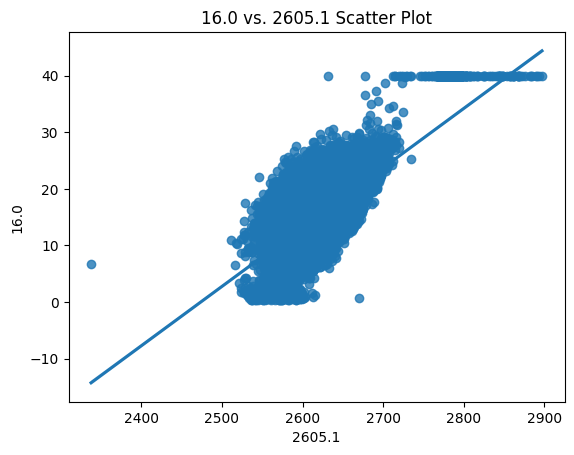

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/17112001.csv')

# Create a scatter plot of 'price' versus 'enginesize'
sns.regplot(x=df['2605.1'], y=df['16.0'])
plt.xlabel('2605.1')
plt.ylabel('16.0')
plt.title('16.0 vs. 2605.1 Scatter Plot')

# Save the plot as a PDF file with a fit margin
plt.savefig('pricevsenginesize1.pdf', bbox_inches='tight')

plt.show()

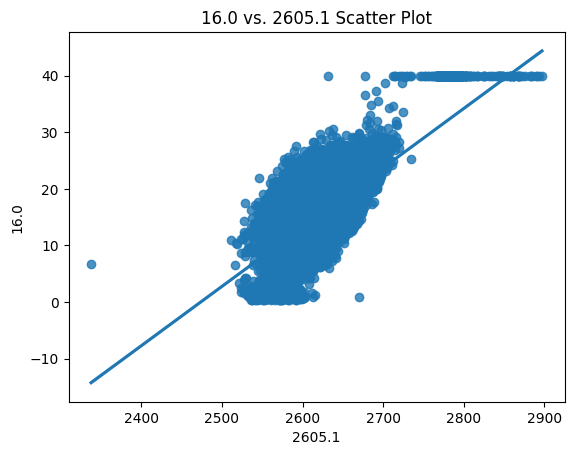

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/17112001.csv')

# Create a scatter plot of 'price' versus 'enginesize'
sns.regplot(x=df['2605.1'], y=df['16.0'])
plt.xlabel('2605.1')
plt.ylabel('16.0')
plt.title('16.0 vs. 2605.1 Scatter Plot')

# Save the plot as a PDF file with a fit margin
plt.savefig('pricevsenginesize2.pdf', bbox_inches='tight')

plt.show()

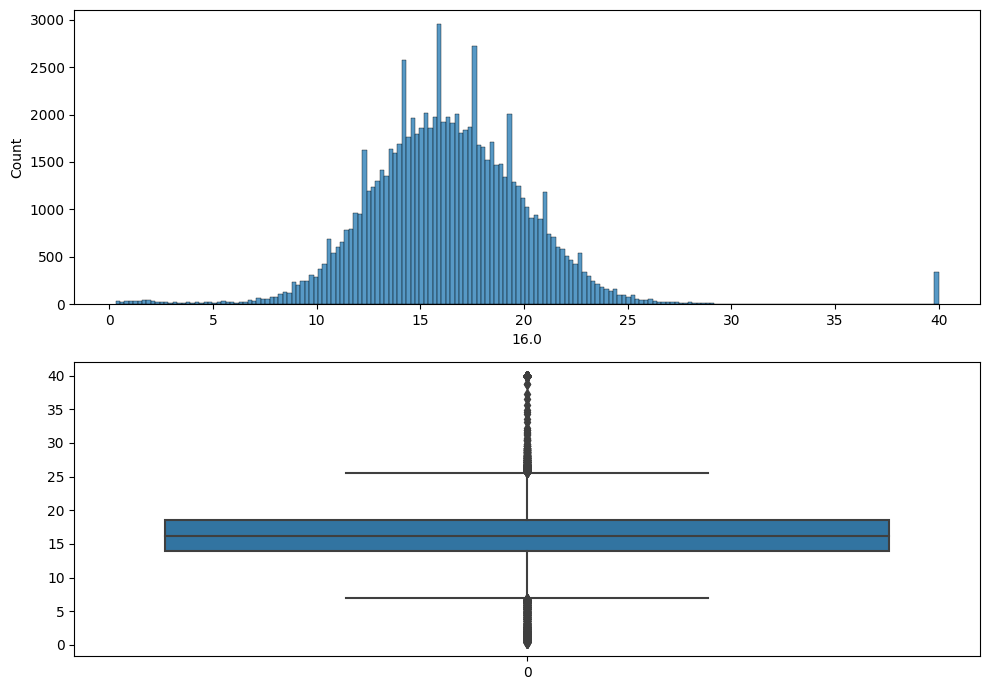

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['16.0'])
fig.add_subplot(2,1,2)
sns.boxplot(df['16.0'])
plt.tight_layout()

In [ ]:
df_price_sqft= (df.loc[:,['16.0','2605.1']] - df.loc[:,['16.0','2605.1']].mean()) / df.loc[:,['16.0','2605.1']].std()
df_price_sqft

,16.0,2605.1
0,-0.242247,-0.955748
1,-0.268128,-3.113699
2,-1.070459,-1.121418
3,-0.863406,-0.875037
4,-1.251631,-1.414525
...,...,...
86394,0.301268,0.828385
86395,0.689492,1.325393
86396,0.689492,0.705195
86397,0.870664,0.828385


<Axes: xlabel='2605.1', ylabel='16.0'>

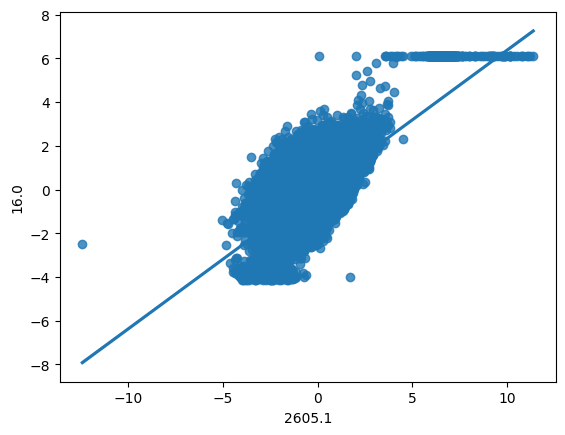

In [ ]:
sns.regplot(x= df_price_sqft['2605.1'],y= df_price_sqft['16.0'])

# 0. Data & Prerocess

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QSqgjDzMtwjLS8on_ZMTEwRNFm1-Ib4D
!gdown 1eWsTiKPnH3rsjdRxDRiL13sQaYmJC5mh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1QSqgjDzMtwjLS8on_ZMTEwRNFm1-Ib4D
To: /content/PRSA_Data_Aotizhongxin_20130301-20170228.csv
100% 2.84M/2.84M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eWsTiKPnH3rsjdRxDRiL13sQaYmJC5mh
To: /content/dataset.csv
100% 23.9k/23.9k [00:00<00:00, 50.3MB/s]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D , Dropout , Flatten , BatchNormalization,LSTM
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix
import pandas as pd 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#  Read dataset

df=pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df=df[['PM2.5','PM10','CO','TEMP','PRES','DEWP','RAIN','wd','WSPM']]
df.shape
df.head()

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,4.0,4.0,300.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,8.0,8.0,300.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,7.0,7.0,300.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,6.0,6.0,300.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,3.0,3.0,300.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
from sklearn.exceptions import FitFailedWarning
# convert wind factor
mymap = {'N':0,'NNE':22.5,'NE':45,'ENE':67.5,'E':90,"ESE":112.5,"SE":135,"SSE":157.5,"S":180,'SSW':202.5,"SW":225,"WSW":247.5,"W":270,"WNW":292.5,"NW":315,"NNW":337.5}
df['wd']=df['wd'].map(mymap)
df.head()
check_nan=df.isnull().sum()
print(check_nan)
l=list(df.columns)
for i in l:
  df[i]=df[i].interpolate(method="linear")
check_nan=df.isnull().sum()
print(check_nan)
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

PM2.5     925
PM10      718
CO       1776
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64
PM2.5    0
PM10     0
CO       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,0.001117,0.002037,0.020202,0.280977,0.661319,0.258621,0.0,1.000000,0.392857
1,0.005587,0.006110,0.020202,0.273997,0.664884,0.268025,0.0,0.000000,0.419643
2,0.004469,0.005092,0.020202,0.273997,0.670232,0.268025,0.0,1.000000,0.500000
3,0.003352,0.004073,0.020202,0.268761,0.688057,0.249216,0.0,0.933333,0.276786
4,0.000000,0.001018,0.020202,0.258290,0.700535,0.247649,0.0,0.000000,0.178571


<Axes: >

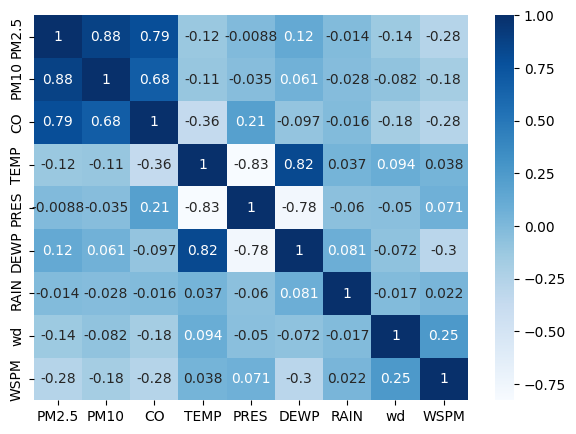

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

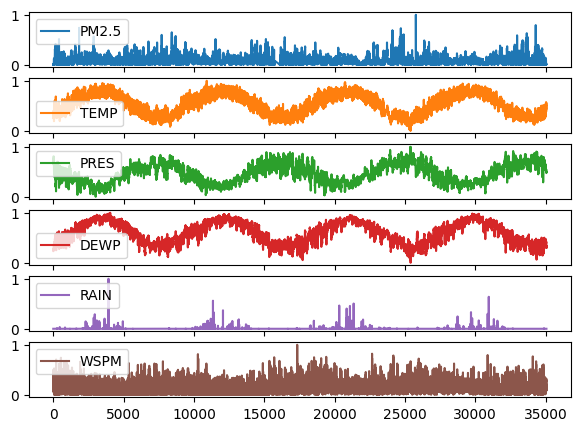

In [ ]:
df[['PM2.5','TEMP','PRES','DEWP','RAIN','WSPM']].plot(subplots=True,figsize=(7,5))

# Pre-process

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 14tBBbg5ix6PMqx4dGHxSYN1gCe3pEY03

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=14tBBbg5ix6PMqx4dGHxSYN1gCe3pEY03
To: /content/Data.zip
100% 93.8M/93.8M [00:03<00:00, 25.4MB/s]


In [ ]:
!mkdir /content/Data
!unzip /content/Data.zip -d /content/Data

Archive:  /content/Data.zip
  inflating: /content/Data/01112001.txt  
  inflating: /content/Data/02112001.txt  
  inflating: /content/Data/03112001.txt  
  inflating: /content/Data/04112001.txt  
  inflating: /content/Data/05112001.txt  
  inflating: /content/Data/06112001.txt  
  inflating: /content/Data/07112001.txt  
  inflating: /content/Data/08112001.txt  
  inflating: /content/Data/09112001.txt  
  inflating: /content/Data/10112001.txt  
  inflating: /content/Data/11112001.txt  
  inflating: /content/Data/12112001.txt  
  inflating: /content/Data/13112001.txt  
  inflating: /content/Data/14112001.txt  
  inflating: /content/Data/15112001.txt  
  inflating: /content/Data/16112001.txt  
  inflating: /content/Data/17112001.txt  
  inflating: /content/Data/18112001.txt  
  inflating: /content/Data/19112001.txt  
  inflating: /content/Data/20112001.txt  
  inflating: /content/Data/21112001.txt  
  inflating: /content/Data/22112001.txt  
  inflating: /content/Data/29102001.txt  
  infl

In [ ]:
import os
import csv
import pandas as pd
import scipy.io as sio

# Path to the folder with the txt files
path1 = r'/content/Data'
!mkdir /content/DataCSV
path2 = r'/content/DataCSV'

# List of all the txt files in the folder
files = os.listdir(path1)

# Loop to convert all the txt files to csv files
for file in files:
    # Read the txt file
    df = pd.read_csv(path1 + '/' + file, sep='\t')
    # Save the csv file
    df.to_csv(path2 + '/' + file[:-4] + '.csv', index=False, columns=df.columns[1:])

In [ ]:
# Path to the folder with the txt files
path1 = r'/content/DataCSV'
!mkdir /content/DataMAT
path2 = r'/content/DataMAT'

# List of all the txt files in the folder
files = os.listdir(path1)

# Loop to convert all the csv files to mat files
for file in files:
    # Read the csv file
    df = pd.read_csv(path1 + '/' + file)
    # Save the mat file
    sio.savemat(path2 + '/' + file[:-4] + '.mat', {'data': df.values})

In [ ]:
!zip -r /content/DataCSV.zip /content/DataCSV
!zip -r /content/DataMAT.zip /content/DataMAT
from google.colab import files
files.download("/content/DataCSV.zip")
files.download("/content/DataMAT.zip")

  adding: content/DataCSV/ (stored 0%)
  adding: content/DataCSV/02112001.csv (deflated 80%)
  adding: content/DataCSV/31102001.csv (deflated 80%)
  adding: content/DataCSV/22112001.csv (deflated 77%)
  adding: content/DataCSV/06112001.csv (deflated 77%)
  adding: content/DataCSV/29102001.csv (deflated 78%)
  adding: content/DataCSV/18112001.csv (deflated 77%)
  adding: content/DataCSV/08112001.csv (deflated 77%)
  adding: content/DataCSV/16112001.csv (deflated 77%)
  adding: content/DataCSV/05112001.csv (deflated 77%)
  adding: content/DataCSV/09112001.csv (deflated 77%)
  adding: content/DataCSV/14112001.csv (deflated 77%)
  adding: content/DataCSV/19112001.csv (deflated 77%)
  adding: content/DataCSV/21112001.csv (deflated 77%)
  adding: content/DataCSV/04112001.csv (deflated 78%)
  adding: content/DataCSV/15112001.csv (deflated 77%)
  adding: content/DataCSV/13112001.csv (deflated 78%)
  adding: content/DataCSV/07112001.csv (deflated 77%)
  adding: content/DataCSV/01112001.csv (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp DataCSV.zip /content/drive/MyDrive/HW1/Data
!cp DataMAT.zip /content/drive/MyDrive/HW1/Data

In [ ]:
%cp -av /content/DataCSV /content/drive/MyDrive/HW1/Data
%cp -av /content/DataMAT /content/drive/MyDrive/HW1/Data

'/content/DataCSV' -> '/content/drive/MyDrive/HW1/Data/DataCSV'
'/content/DataCSV/20112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/20112001.csv'
'/content/DataCSV/06112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/06112001.csv'
'/content/DataCSV/22112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/22112001.csv'
'/content/DataCSV/08112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/08112001.csv'
'/content/DataCSV/19112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/19112001.csv'
'/content/DataCSV/01112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/01112001.csv'
'/content/DataCSV/09112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/09112001.csv'
'/content/DataCSV/29102001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/29102001.csv'
'/content/DataCSV/15112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/15112001.csv'
'/content/DataCSV/07112001.csv' -> '/content/drive/MyDrive/HW1/Data/DataCSV/07112001.csv'
'/content/DataCSV/17112001.csv' -> '